In [48]:
from datetime import datetime
import pandas as pd
from sportsreference.ncaaf.boxscore import Boxscores, Boxscore
from sportsreference.ncaaf.rankings import Rankings
from sportsreference.ncaaf.roster import Player, Roster
from sportsreference.ncaaf.player import AbstractPlayer
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
games = Boxscores(datetime(2019, 8, 20), datetime.today())

In [ ]:
games.games.values()

In [ ]:
list_dfs = []
for k,v in games.games.items():
    df = pd.DataFrame.from_dict(v)
    df['date'] = k
    list_dfs.append(df)#.iloc[:,0].apply(pd.Series))
#print(list_dfs)

In [ ]:
df = pd.concat(list_dfs)
df.head()

In [ ]:
game_stats = Boxscore(df.boxscore.unique().tolist()[0])
print(game_stats.away_first_downs)

In [2]:
rankings = Rankings(2019)
# Prints detailed information for all teams for all weeks where rankings
# have been published for the requested season.
#print(rankings.complete)
rank_dfs = []
for k,v in rankings.complete.items():
    df = pd.DataFrame.from_dict(v)
    rank_dfs.append(df)#.iloc[:,0].apply(pd.Series))
#print(list_dfs)

rank_df = pd.concat(rank_dfs)
rank_df.head(10)

,abbreviation,name,rank,week,date,previous,change
0,clemson,Clemson,1,3,2019-09-08,1,0
1,alabama,Alabama,2,3,2019-09-08,2,0
2,georgia,Georgia,3,3,2019-09-08,3,0
3,louisiana-state,LSU,4,3,2019-09-08,6,2
4,oklahoma,Oklahoma,5,3,2019-09-08,4,-1
5,ohio-state,Ohio State,6,3,2019-09-08,5,-1
6,notre-dame,Notre Dame,7,3,2019-09-08,8,1
7,auburn,Auburn,8,3,2019-09-08,10,2
8,florida,Florida,9,3,2019-09-08,11,2
9,michigan,Michigan,10,3,2019-09-08,7,-3


In [ ]:
top_10 = rank_df[rank_df.name.isin(rank_df.head(10).name.tolist())]#.iloc[:10,]

In [99]:
top_10_teams = top_10.name.unique().tolist()
top_10_teams = [t.upper() for t in top_10_teams]
print(top_10_teams)

['CLEMSON', 'ALABAMA', 'GEORGIA', 'LSU', 'OKLAHOMA', 'OHIO STATE', 'NOTRE DAME', 'AUBURN', 'FLORIDA', 'MICHIGAN']


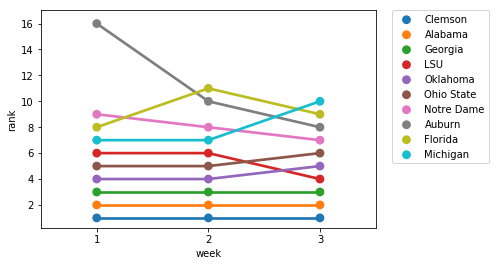

In [36]:
sns.pointplot(x="week", y="rank", hue="name", data=top_10)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

df = pd.DataFrame.from_dict(games.games).iloc[:,0].apply(pd.Series)
df.head()

blough = Player('patrick-mcclure-1')  # Currently pulling career stats
# Prints Blough's passing touchdowns for the 2017 season only
df = blough('2019').dataframe
#df['player'] = player
#df.head()
print(df)

In [145]:
team = Roster('CLEMSON',slim=True)
player_df = []
for player in team.players:
    # Prints the name of all players who played for the Purdue Boilermakers
    # in the most recent season.
    #print(player)
    p = Player(player)
    df = p.dataframe
    if df is not None:
        df['player'] = player
        player_df.append(df)

team_stats = pd.concat(player_df)

In [100]:
top_10_stats = []
for t in top_10_teams:
    team = Roster(t,slim=True)
    player_df = []
    for player in team.players:
        # Prints the name of all players who played for the Purdue Boilermakers
        # in the most recent season.
        #print(player)
        p = Player(player)
        df = p.dataframe
        if df is not None:
            df['player'] = player
            player_df.append(df)

    team_stats = pd.concat(player_df)
    top_10_stats.append(team_stats)

all_team_stats = pd.concat(top_10_stats)

ValueError: Can't pull requested team page. Ensure the following URL exists: https://www.sports-reference.com/cfb/schools/lsu/2019-roster.html

In [146]:
team_stats.reset_index(inplace=True)

In [147]:
team_stats.rename(columns={'level_0': "Year"},inplace=True)

In [148]:
team_stats.head()

,Year,adjusted_yards_per_attempt,assists_on_tackles,completed_passes,extra_points_made,field_goals_made,fumbles_forced,fumbles_recovered,fumbles_recovered_for_touchdown,games,...,total_touchdowns,two_point_conversions,weight,yards_from_scrimmage,yards_from_scrimmage_per_play,yards_recovered_from_fumble,yards_returned_from_interceptions,yards_returned_per_interception,year,player
0,2018,9.3,0,259,0,0,0,0,None,15.0,...,1,None,215,165,2.7,None,0,None,FR,trevor-lawrence-1
1,2019,5.9,0,37,0,0,0,0,None,2.0,...,2,None,215,13,1.9,None,0,None,SO,trevor-lawrence-1
2,Career,8.9,0,296,0,0,0,0,None,NaN,...,3,None,215,178,2.6,None,0,None,,trevor-lawrence-1
3,2017,NaN,None,NaN,None,None,None,None,None,NaN,...,None,None,225,0,NaN,None,None,None,FR,chase-brice-1
4,2018,8,None,32,None,None,None,None,None,12.0,...,None,None,225,93,5.8,None,None,None,FR,chase-brice-1


In [149]:
team_stats.columns.tolist()
team_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 55 columns):
Year                                    200 non-null object
adjusted_yards_per_attempt              12 non-null object
assists_on_tackles                      141 non-null object
completed_passes                        17 non-null object
extra_points_made                       72 non-null object
field_goals_made                        72 non-null object
fumbles_forced                          141 non-null object
fumbles_recovered                       141 non-null object
fumbles_recovered_for_touchdown         4 non-null object
games                                   123 non-null float64
height                                  200 non-null object
interceptions                           142 non-null object
interceptions_returned_for_touchdown    142 non-null object
interceptions_thrown                    17 non-null object
kickoff_return_touchdowns               72 non-null object
na

In [153]:
for c in team_stats.columns.tolist():
    if c not in ['Year','height','name','player_id','position',
                 'season','team_abbreviation','year','player','assists_on_tackles',
                'completed_passes']:
        print(c)
        team_stats[c] = team_stats[c].astype('float')
        #team_stats[c] = pd.to_numeric(team_stats[c])


team_stats[team_stats['Year'] == '2019'].groupby(by=['Year','team_abbreviation','position']).mean().to_excel("output.xlsx")

adjusted_yards_per_attempt
extra_points_made
field_goals_made
fumbles_forced
fumbles_recovered
fumbles_recovered_for_touchdown
games
interceptions
interceptions_returned_for_touchdown
interceptions_thrown
kickoff_return_touchdowns
other_touchdowns
pass_attempts
passes_defended
passing_completion
passing_touchdowns
passing_yards
passing_yards_per_attempt
plays_from_scrimmage
points
punt_return_touchdowns
quarterback_rating
receiving_touchdowns
receiving_yards
receiving_yards_per_reception
receptions
rush_attempts
rush_touchdowns
rush_yards
rush_yards_per_attempt
rushing_and_receiving_touchdowns
sacks
safeties
solo_tackles
tackles_for_loss
total_tackles
total_touchdowns
two_point_conversions
weight
yards_from_scrimmage
yards_from_scrimmage_per_play
yards_recovered_from_fumble
yards_returned_from_interceptions
yards_returned_per_interception
